# Assignment on Python Libraries
*   The dataset for this assignment is provided in the same folder as the assignment.
*   Try to write optimal code for each section and explain your understanding wherever required.
*  Required Libraries are imported wherever needed.
*   It's suggested to do it after studying all topics to reinforce your learning. Just a reminder, this assignment can be done in 10min using A.I, which will increase your skill of chatting with chatgpt (**but nothing else**), so try to approach with a bit more purpose.


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Read the csv and store it in a dataframe named mobile_usage
*  Identify the null values in the dataframe and print the count of null values in each column

In [79]:
df = pd.read_csv("mobile_usage_behavioral_analysis.csv")
counts = []
for col in df:
	counts.append(df[col].isna().sum()) # each column will have a true where there is a null value, then sum of each column basically gives the number of nulls in that column
counts
pd.Series(counts, index=df.columns)

User_ID                         0
Age                             0
Gender                          0
Total_App_Usage_Hours           0
Daily_Screen_Time_Hours         0
Number_of_Apps_Used             0
Social_Media_Usage_Hours        0
Productivity_App_Usage_Hours    0
Gaming_App_Usage_Hours          0
Location                        0
dtype: int64

#Identify Different dtypes of the columns

In [80]:
df.dtypes

User_ID                           int64
Age                               int64
Gender                           object
Total_App_Usage_Hours           float64
Daily_Screen_Time_Hours         float64
Number_of_Apps_Used               int64
Social_Media_Usage_Hours        float64
Productivity_App_Usage_Hours    float64
Gaming_App_Usage_Hours          float64
Location                         object
dtype: object

#Get the count of number of people of each age  in the dataset and store it in a 2-d numpy array with first element in row being age and second element number of people with that age.

In [81]:
ageCount = np.column_stack(np.unique(df["Age"].values, return_counts=True)) # at first i tried zip, but apparently column_stack is much more optimized for large datasets, like this one
ageCount

array([[18, 27],
       [19, 27],
       [20, 25],
       [21, 21],
       [22, 29],
       [23, 25],
       [24, 15],
       [25, 27],
       [26, 21],
       [27, 20],
       [28, 23],
       [29, 23],
       [30, 20],
       [31, 24],
       [32, 22],
       [33, 21],
       [34, 24],
       [35, 17],
       [36, 21],
       [37, 19],
       [38, 20],
       [39, 24],
       [40, 25],
       [41, 27],
       [42, 27],
       [43, 34],
       [44, 18],
       [45, 30],
       [46, 23],
       [47, 24],
       [48, 18],
       [49, 26],
       [50, 37],
       [51, 19],
       [52, 32],
       [53, 25],
       [54, 31],
       [55, 20],
       [56, 28],
       [57, 23],
       [58, 19],
       [59, 19]])

#Calculate the average usage_time for different age groups and identify the age group with the highest total usage_time (screen time).
#Plot graphs of average usage_time versus age:
* Scatter plot
* Bar graph

In [82]:
ageScreentimeAVG = np.empty((0,2))
for age in np.unique(df["Age"].values):
	screentimes = df.loc[df["Age"]==age, "Daily_Screen_Time_Hours"] # get truth table of Age==age, then choose column of screentime
	average = screentimes.sum()/screentimes.count()
	ageScreentimeAVG = np.append(ageScreentimeAVG, [[age,average]], axis=0)
ageScreentimeAVG

array([[18.        ,  8.61666667],
       [19.        ,  7.5862963 ],
       [20.        ,  7.9632    ],
       [21.        ,  7.26285714],
       [22.        ,  8.79551724],
       [23.        ,  8.1644    ],
       [24.        ,  7.44333333],
       [25.        ,  8.09407407],
       [26.        ,  5.96190476],
       [27.        ,  7.3015    ],
       [28.        ,  6.24      ],
       [29.        ,  7.27434783],
       [30.        ,  9.01      ],
       [31.        ,  7.705     ],
       [32.        ,  7.96545455],
       [33.        ,  8.40571429],
       [34.        ,  7.7175    ],
       [35.        ,  7.88411765],
       [36.        ,  7.09952381],
       [37.        ,  6.73      ],
       [38.        ,  7.2595    ],
       [39.        ,  7.0925    ],
       [40.        ,  7.9232    ],
       [41.        ,  7.83259259],
       [42.        ,  8.5862963 ],
       [43.        ,  8.66382353],
       [44.        ,  6.18944444],
       [45.        ,  7.288     ],
       [46.        ,

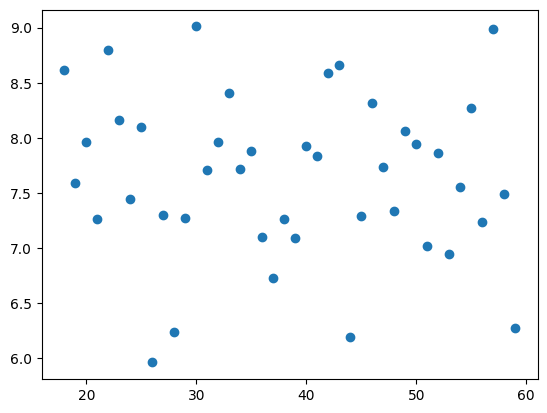

In [83]:
plt.scatter(ageScreentimeAVG[:,0], ageScreentimeAVG[:, 1], marker='o')

(5.5, 9.5)

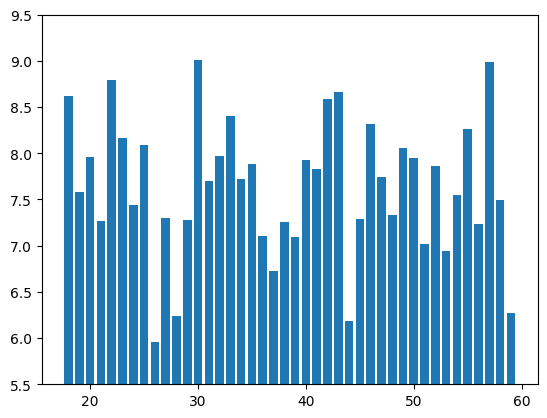

In [84]:
plt.bar(ageScreentimeAVG[:,0], ageScreentimeAVG[:,1])
plt.ylim(5.5,9.5)

#Sort the DataFrame by age using both Pandas and NumPy.
* Remove the data of individuals above 45 years of age and  store the modified DataFrame in a new variable new_df.

In [85]:
df.sort_values("Age")

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
924,925,18,Male,5.54,2.01,28,1.23,3.15,1.67,New York
397,398,18,Female,8.94,7.09,22,3.67,2.43,2.81,New York
80,81,18,Male,7.57,10.63,9,0.06,2.41,2.42,New York
563,564,18,Male,7.58,7.26,22,4.00,3.10,2.42,Chicago
353,354,18,Male,5.65,8.34,13,3.83,3.31,3.25,Phoenix
...,...,...,...,...,...,...,...,...,...,...
128,129,59,Female,4.92,2.32,20,3.49,2.68,4.89,New York
27,28,59,Female,7.74,6.16,24,1.36,2.77,4.63,New York
729,730,59,Female,5.08,12.06,8,0.55,1.22,0.18,Phoenix
56,57,59,Male,8.19,1.53,6,3.79,1.71,2.06,Houston


In [86]:
df.iloc[np.argsort(df["Age"].values)] # argsort creates the indices to which are arranged in order of the sort

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
924,925,18,Male,5.54,2.01,28,1.23,3.15,1.67,New York
397,398,18,Female,8.94,7.09,22,3.67,2.43,2.81,New York
80,81,18,Male,7.57,10.63,9,0.06,2.41,2.42,New York
563,564,18,Male,7.58,7.26,22,4.00,3.10,2.42,Chicago
353,354,18,Male,5.65,8.34,13,3.83,3.31,3.25,Phoenix
...,...,...,...,...,...,...,...,...,...,...
128,129,59,Female,4.92,2.32,20,3.49,2.68,4.89,New York
27,28,59,Female,7.74,6.16,24,1.36,2.77,4.63,New York
729,730,59,Female,5.08,12.06,8,0.55,1.22,0.18,Phoenix
56,57,59,Male,8.19,1.53,6,3.79,1.71,2.06,Houston


In [87]:
new_df = df[df["Age"]<=45]
new_df

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York
6,7,36,Male,4.81,1.52,24,3.76,1.58,3.59,Los Angeles
7,8,40,Male,9.53,8.85,11,2.66,0.28,2.93,Chicago
...,...,...,...,...,...,...,...,...,...,...
992,993,30,Female,8.04,12.51,10,3.00,4.34,0.96,New York
995,996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles
996,997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles
998,999,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix


### Add a New Column **location_type**
*  Create a new column named location_type in the original DataFrame (mobile_usage).
*  Assign integer labels to locations based on their frequency (in descending order):
 *  The most frequent location should be labeled as 0.
 *  The second most frequent location should be labeled as 1, and so on.
 *  Less frequent locations will have higher integer values.
*  Ensure that the labels are assigned based strictly on the frequency ranking of the locations.

In [88]:
locCount = np.column_stack(np.unique(df["Location"].values, return_counts=True))
locCount = locCount[np.argsort(locCount[:, 1])[::-1]] # sort with largest at top
locCount[:,1] = range(len(locCount))
locCount

array([['New York', 0],
       ['Phoenix', 1],
       ['Chicago', 2],
       ['Los Angeles', 3],
       ['Houston', 4]], dtype=object)

In [89]:
df["location_type"] = list(map(lambda l: locCount[locCount[:, 0] == l][0][1], df["Location"])) # the lambda func gives the freq value corresponding to the location
df

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,location_type
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,3
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,2
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,4
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,1
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles,3
996,997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles,3
997,998,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix,1
998,999,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix,1


### Normalisation
 Normalization is a process used to adjust the scale or range of data values, making them consistent and comparable across different features or datasets. It ensures that all features contribute equally to a model or analysis, especially when they have vastly different scales.

 Just understand the definition for now , in the upcoming weeks this topic will be discussed in detail.

*  Normalize the gaming app usage hours using min-max scaling (https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) and store it in some numpy array .
*  Verify whether the normalisation correct or not by plotting histograms with same name number of bins(Why?Is it correct?) .
*  (Optional) Write a function which takes argument a dataframe and returns a dataframe which have all columns in its **Normalized** by min - max scaling


In [90]:
x = df["Gaming_App_Usage_Hours"].values
xNorm = (x - x.min())/(x.max() - x.min())
xNorm

array([0.47895792, 0.48496994, 0.56513026, 0.91583166, 0.7995992 ,
       0.4509018 , 0.71743487, 0.58517034, 0.49098196, 0.19038076,
       0.46292585, 0.24448898, 0.91382766, 0.33466934, 0.95190381,
       0.53306613, 0.63126253, 0.54108216, 0.12825651, 0.3747495 ,
       0.09819639, 0.62124248, 0.44488978, 0.77755511, 0.21843687,
       0.16232465, 0.40480962, 0.9258517 , 0.70941884, 0.41683367,
       0.51703407, 0.08216433, 0.98396794, 0.66533066, 0.28456914,
       0.58517034, 0.10821643, 0.96593186, 0.17234469, 0.64729459,
       0.24448898, 0.71743487, 0.7755511 , 0.67334669, 0.61322645,
       0.89178357, 0.0761523 , 0.32865731, 0.24649299, 0.98797595,
       0.38877756, 0.73146293, 0.68336673, 0.21042084, 0.23647295,
       0.28056112, 0.41082164, 0.23246493, 0.01803607, 0.87975952,
       0.96593186, 0.34068136, 0.33667335, 0.00601202, 0.67935872,
       0.8256513 , 0.14428858, 0.15831663, 0.78957916, 0.61523046,
       0.04208417, 0.62124248, 0.30661323, 0.36673347, 0.76953

In [91]:
x.max() - x.min()

np.float64(4.99)

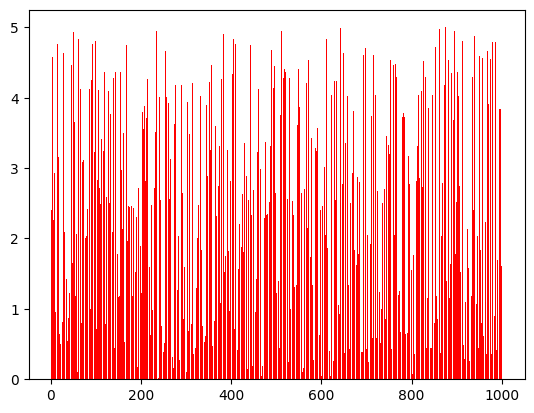

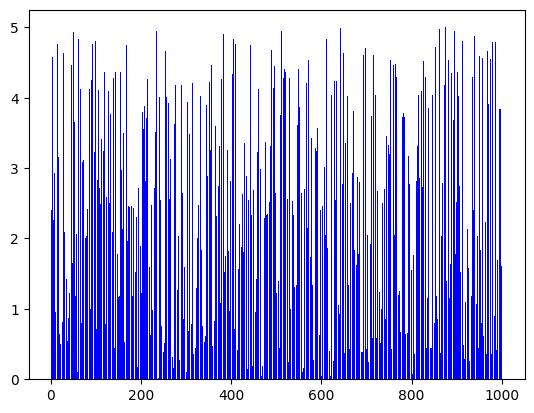

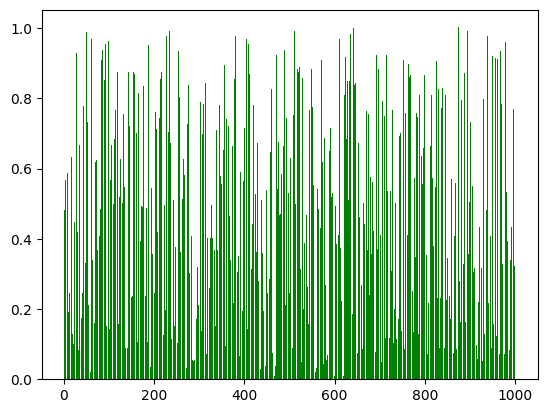

In [75]:
plt.bar(df["User_ID"].values, x, color="red")
plt.show()
plt.bar(df["User_ID"].values, xNorm*4.99, color="blue") # no idea why the graph after doing *4.99 looks same as the unnormalized one, but the actual one does not. It should mathematically be the same thing
plt.show()
plt.bar(df["User_ID"].values, xNorm, color="green")
plt.show()

In [113]:
def normalizeDF(df):
	normdf = df.copy()
	for col in df:
		i = df[col].values
		try:
			normdf[col] = (i - i.min())/(i.max() - i.min())
		except:
			pass # try to perform the action, but it may fail when entries are non numerical, so just ignore errors
	return normdf

normalizeDF(df)

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,location_type
0,0.000000,0.926829,Male,0.146764,0.472671,0.807692,0.887776,0.110,0.478958,Los Angeles,0.75
1,0.001001,0.682927,Male,0.103008,0.983834,0.576923,0.935872,0.884,0.484970,Chicago,0.50
2,0.002002,0.341463,Female,0.572470,0.268668,0.307692,0.917836,0.342,0.565130,Houston,1.00
3,0.003003,0.170732,Female,0.018232,0.406467,0.692308,0.637275,0.684,0.915832,Phoenix,0.25
4,0.004004,0.487805,Male,0.484047,0.891455,0.423077,0.631263,0.026,0.799599,New York,0.00
...,...,...,...,...,...,...,...,...,...,...,...
995,0.995996,0.560976,Female,0.235187,0.881447,0.384615,0.825651,0.488,0.264529,Los Angeles,0.75
996,0.996997,0.341463,Male,0.788514,0.731332,0.307692,0.204409,0.204,0.767535,Los Angeles,0.75
997,0.997998,0.682927,Female,0.973564,0.696690,0.230769,0.470942,0.626,0.204409,Phoenix,0.25
998,0.998999,0.170732,Male,0.263446,0.752117,0.461538,0.801603,0.358,0.320641,Phoenix,0.25


### Plot the relationship between Number_of_apps_used and Daily_Screen_Time_Hours using different types of plots (e.g., scatter plot, line plot, bar graph, etc.).
* Analyze the plots and explain which type of plot best illustrates the relationship between these two variables

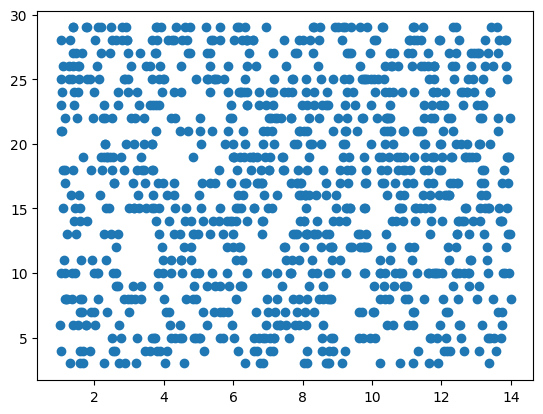

In [ ]:
plt.scatter(df["Daily_Screen_Time_Hours"],df["Number_of_Apps_Used"]) # based on this, the density is mostly same everywhere, so the values seem to be un-correlated

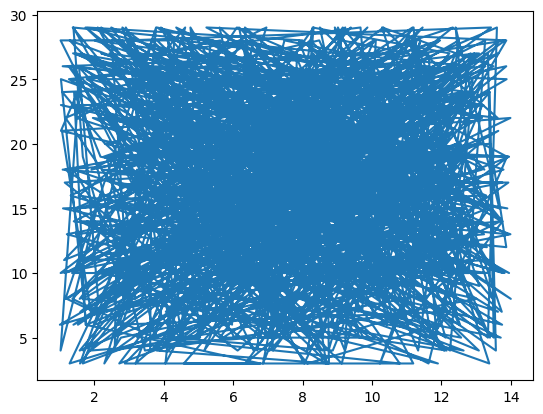

In [ ]:
plt.plot(df["Daily_Screen_Time_Hours"], df["Number_of_Apps_Used"]) # nothing meaningful can be known from this, as even the density here is influenced by intercrossing lines, which are not giving any information in this case

<BarContainer object of 1000 artists>

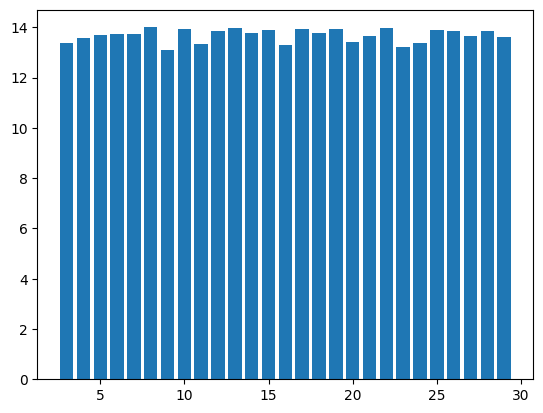

In [ ]:
plt.bar(df["Number_of_Apps_Used"], df["Daily_Screen_Time_Hours"]) # this is also not very useful, as this only compares the maximum number of hours for each number of apps used

# Broadcasting

*  Use multiple columns from a DataFrame to represent points in an n-dimensional space (take atleast 3 columns).
*  Calculate the Euclidean distance between all pairs of points using:
* A loop-based approach (without broadcasting).
* A vectorized approach using broadcasting.
* Compare the results and performance of both methods.


### To compare the performances use the time module

 A sample code is given below .


In [ ]:
# import time

# # Timing the loop-based approach
# start_time = time.time()
# # (Loop-based distance calculation code here)
# end_time = time.time()
# print(f"Loop-based method took {end_time - start_time:.6f} seconds")

# # Timing the broadcasting approach
# start_time = time.time()
# # (Broadcasting-based distance calculation code here)
# end_time = time.time()
# print(f"Broadcasting method took {end_time - start_time:.6f} seconds")

In [120]:
points = np.empty((0,3))
for i in range(len(df)):
	points = np.append(points, [[df["Social_Media_Usage_Hours"][i], df["Productivity_App_Usage_Hours"][i], df["Gaming_App_Usage_Hours"][i]]], axis=0)
points

array([[4.43, 0.55, 2.4 ],
       [4.67, 4.42, 2.43],
       [4.58, 1.71, 2.83],
       ...,
       [2.35, 3.13, 1.03],
       [4.  , 1.79, 1.61],
       [0.9 , 4.98, 2.33]], shape=(1000, 3))

In [ ]:
import time

def dist(pt1, pt2):
	return np.sqrt(np.square(pt1-pt2).sum(axis=-1)) # axis -1 so that it also works with the broadcasting method (btw only a 0.05 sec diff due to addition of axis in loop method)

dists = []
start_time = time.time()
for i in range(len(points)-1):
	for j in range(i+1, len(points)):
		dists.append(dist(points[i], points[j]))
end_time = time.time()
print(f"Loop-based method took {end_time - start_time:.6f} seconds")
dists

Loop-based method took 1.139214 seconds


[np.float64(3.8775507733619685),
 np.float64(1.2461942063739504),
 np.float64(3.8146821623826015),
 np.float64(2.091602256644413),
 np.float64(3.773287691125605),
 np.float64(1.7105262348178116),
 np.float64(1.867270735592458),
 np.float64(2.7083574357901874),
 np.float64(2.78212149267425),
 np.float64(1.5823084402227017),
 np.float64(1.2196310917650466),
 np.float64(4.2935998882057),
 np.float64(1.2144546101028229),
 np.float64(2.92788319439147),
 np.float64(4.01459836098208),
 np.float64(2.449673447625213),
 np.float64(3.1613130183517097),
 np.float64(1.757811138888362),
 np.float64(3.3614580169920316),
 np.float64(4.505607617181061),
 np.float64(2.147510186238938),
 np.float64(4.6697858623281645),
 np.float64(3.2867308986286052),
 np.float64(3.756221505715551),
 np.float64(3.88443046018332),
 np.float64(5.745145777088689),
 np.float64(4.396157413014233),
 np.float64(5.0176588166195595),
 np.float64(0.7018546858146635),
 np.float64(0.5239274758971896),
 np.float64(5.115056206924808),

In [ ]:
dists = []
start_time = time.time()
for i in range(len(points)-1):
	dists.extend(dist(points[i],points[i+1:])) # directly finding diff and square and root of a whole set of points
end_time = time.time()
print(f"Broadcasting method took {end_time - start_time:.6f} seconds")
dists

Broadcasting method took 0.022654 seconds


[np.float64(3.8775507733619685),
 np.float64(1.2461942063739504),
 np.float64(3.8146821623826015),
 np.float64(2.091602256644413),
 np.float64(3.773287691125605),
 np.float64(1.7105262348178116),
 np.float64(1.867270735592458),
 np.float64(2.7083574357901874),
 np.float64(2.78212149267425),
 np.float64(1.5823084402227017),
 np.float64(1.2196310917650466),
 np.float64(4.2935998882057),
 np.float64(1.2144546101028229),
 np.float64(2.92788319439147),
 np.float64(4.01459836098208),
 np.float64(2.449673447625213),
 np.float64(3.1613130183517097),
 np.float64(1.757811138888362),
 np.float64(3.3614580169920316),
 np.float64(4.505607617181061),
 np.float64(2.147510186238938),
 np.float64(4.6697858623281645),
 np.float64(3.2867308986286052),
 np.float64(3.756221505715551),
 np.float64(3.88443046018332),
 np.float64(5.745145777088689),
 np.float64(4.396157413014233),
 np.float64(5.0176588166195595),
 np.float64(0.7018546858146635),
 np.float64(0.5239274758971896),
 np.float64(5.115056206924808),